<a href="https://colab.research.google.com/github/qraxiss/learning-data-science/blob/main/machine-learning/classification/random-forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data & Libs

In [ ]:
!pip install skompiler

In [ ]:
# Libs
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from google.colab import drive
from skompiler import skompile
from warnings import filterwarnings
filterwarnings('ignore')

# Data
drive.mount('/content/gdrive')
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/learning-data-science-main/machine-learning/datas/diabetes.csv")
df = df.dropna()
df.index = np.arange(df.shape[0])

# X&y
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

# Test Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=31)

# Model

In [27]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

# Predict

In [28]:
print("Basic Accuracy Score",accuracy_score(y_test, rf_model.predict(X_test)))
print("CV Accuracy Score",cross_val_score(rf_model,
                                          X_test, 
                                          y_test, 
                                          cv=10).mean())

Basic Accuracy Score 0.7445887445887446
CV Accuracy Score 0.7440217391304348


# Python Code

In [ ]:
print(skompile(rf_model.predict).to("python/code"))

# Model Tuning

In [32]:
rf_params = {"max_depth": [2,5],
            "max_features": [2,5],
            "n_estimators": [10,500],
            "min_samples_split": [5,10]}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, rf_params, cv = 2, n_jobs = -1, verbose = 2)
rf_cv_model = rf_cv.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


In [34]:
print("En iyi skor:" + str(rf_cv_model.best_score_))
print("En iyi parametreler: " + str(rf_cv_model.best_params_))
params = pd.Series(rf_cv_model.best_params_)
params

En iyi skor:0.7784081451478666
En iyi parametreler: {'max_depth': 5, 'max_features': 5, 'min_samples_split': 10, 'n_estimators': 10}


max_depth             5
max_features          5
min_samples_split    10
n_estimators         10
dtype: int64

## Tuned Model

In [36]:
rf = RandomForestClassifier(max_depth = params[0], max_features=params[1], min_samples_split = params[2], n_estimators=params[3])
rf_tuned = rf.fit(X_train, y_train) 

In [37]:
print("Basic Accuracy Score",accuracy_score(y_test, rf_tuned.predict(X_test)))
print("CV Accuracy Score",cross_val_score(rf_tuned,
                                          X_test, 
                                          y_test, 
                                          cv=10).mean())

Basic Accuracy Score 0.7445887445887446
CV Accuracy Score 0.7353260869565219


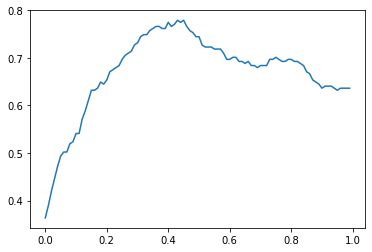

In [38]:
# Yüzdesel Oranlar
y_probs = pd.DataFrame(rf_tuned.predict_proba(X_test))
max = []
for j in np.arange(0,1,0.01):
  y_pred = np.array([1 if i > j else 0 for i in list(y_probs[1])])
  max.append([j ,accuracy_score(y_test, y_pred)])

max = np.array(max)

# Plot
import seaborn as sns
sns.lineplot(y=max[:,1], x=max[:,0])

# Plot

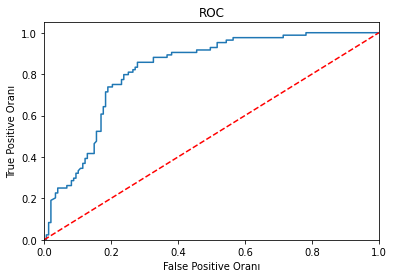

In [39]:
logit_roc_auc = roc_auc_score(y_test, rf_tuned.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, rf_tuned.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()